<a href="https://colab.research.google.com/github/ifekolade/NEBDHub-NSDC-Transportation-Data-Science-Project/blob/main/GitHub_Portfolio_Copy_EXPLORER_NEBDHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **Welcome to the <font color='crimson'>** **Explorer Transportation Data Science Project! 🚗**</font>
 Hosted by the [Northeast Big Data Innovation Hub](https://nebigdatahub.org/about) & [National Student Data Corps](https://nebigdatahub.org/nsdc), in collaboration with the [U.S. Department of Transportation Federal Highway Administration](https://highways.dot.gov/).


---



## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
#Exploratory Data Analysis#
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Step 2:** I will be using the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC."


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# TODO: Read the data using pandas read_csv function
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv")

/tmp/ipython-input-3-1291596096.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv")


# Head function returns first 10 rows of dataset



In [4]:
data.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,04/26/2023,13:30,NaN,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4623759,Sedan,Box Truck,NaN,NaN,NaN
6,11/01/2023,7:12,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/01/2023,8:01,NaN,NaN,NaN,NaN,NaN,WEST 35 STREET,HENRY HUDSON RIVER,NaN,...,NaN,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN
8,04/26/2023,22:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 Ed Koch queensborough bridge,...,NaN,NaN,NaN,NaN,4623865,Sedan,Pick-up Truck,NaN,NaN,NaN
9,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN


#Describing the data

In [5]:

desc_stats = data.describe()
display(desc_stats)

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.944002e+06,1.944002e+06,2.184015e+06,2.184002e+06,2.184033e+06,2.184033e+06,2.184033e+06,2.184033e+06,2.184033e+06,2.184033e+06,2.184033e+06
mean,4.060521e+01,-7.371123e+01,3.236187e-01,1.558149e-03,5.897942e-02,7.742557e-04,2.835214e-02,1.222509e-04,2.318752e-01,6.336901e-04,3.239523e+06
std,2.196996e+00,4.097765e+00,7.110539e-01,4.164484e-02,2.488156e-01,2.843334e-02,1.681284e-01,1.109738e-02,6.722385e-01,2.749541e-02,1.508261e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066743e+01,-7.397462e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.182129e+06
50%,4.072037e+01,-7.392690e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.728295e+06
75%,4.076961e+01,-7.386665e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.274527e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.820622e+06




---



##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>
Assessing the dataset and finding missing values

**Step 2:**
Check the dataset for missing values.


In [6]:

missing_values = data.isnull().sum()

 # Turn the missing value counts into percentages
missing_values_percentage = (missing_values/ len(data)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2174488,99.562964
CONTRIBUTING FACTOR VEHICLE 5,2174183,99.548999
VEHICLE TYPE CODE 4,2149355,98.412203
CONTRIBUTING FACTOR VEHICLE 4,2148061,98.352955
VEHICLE TYPE CODE 3,2032319,93.053493
CONTRIBUTING FACTOR VEHICLE 3,2026275,92.776757
OFF STREET NAME,1804122,82.605071
CROSS STREET NAME,833588,38.167372
ZIP CODE,673428,30.834149
BOROUGH,673157,30.821741


**Bar chart to displaying the top 10 contributing factors (e.g. backing up unsafely, unsafe lane changing, etc.) to crashes within the dataset.**

/tmp/ipython-input-7-2876765743.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


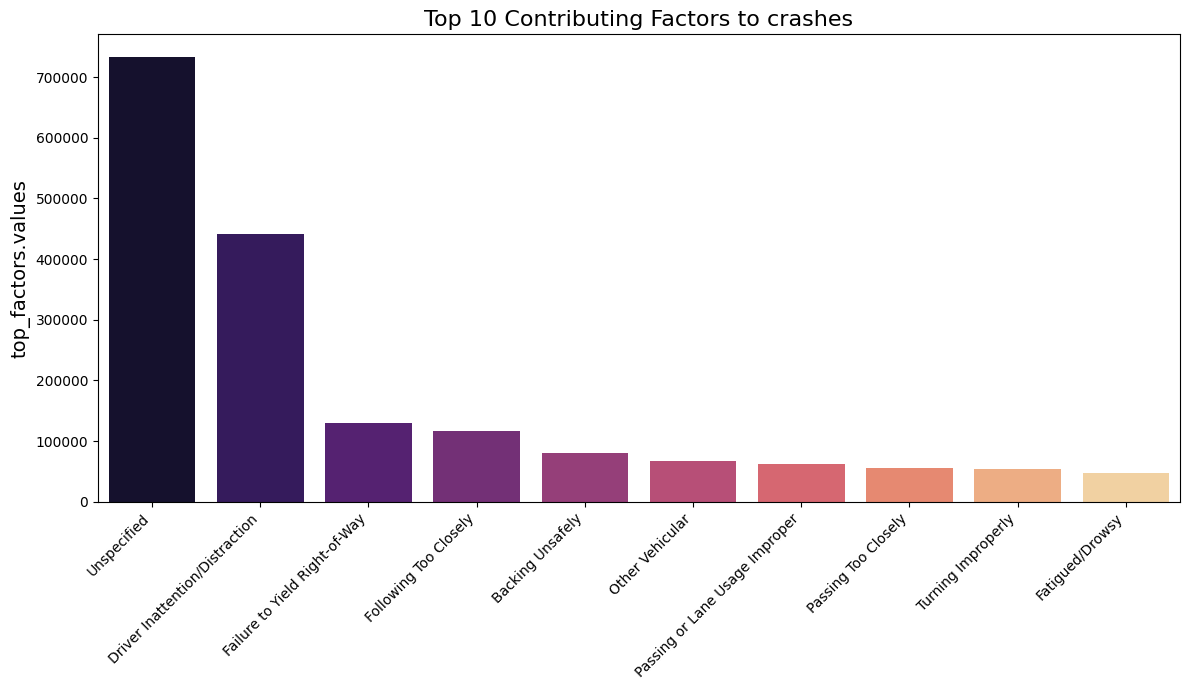

In [7]:
# Plot a Bar Chart

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))
# Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('top_factors.values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 3 contributing factors that cause the most crashes? (Besides Unspecified)

> *  Driver Inattention/ Distraction
> *  Failure to Yielf Right-of-Way
> *  Following Too Closely


Recommendations to New Drivers

>  According to the data, driver inattention/distraction is the leading cause of crashes in the city. Whether you're adjusting a GPS, taking a call, or simply distracted by the constant buzz of city life, even a momentary lapse in focus can have serious consequences. Stay alert, minimize distractions, and remember that all moments count on the road.



** Bar chart to determine which vehicle types were involved in the most crashes. **

/tmp/ipython-input-8-1703702012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


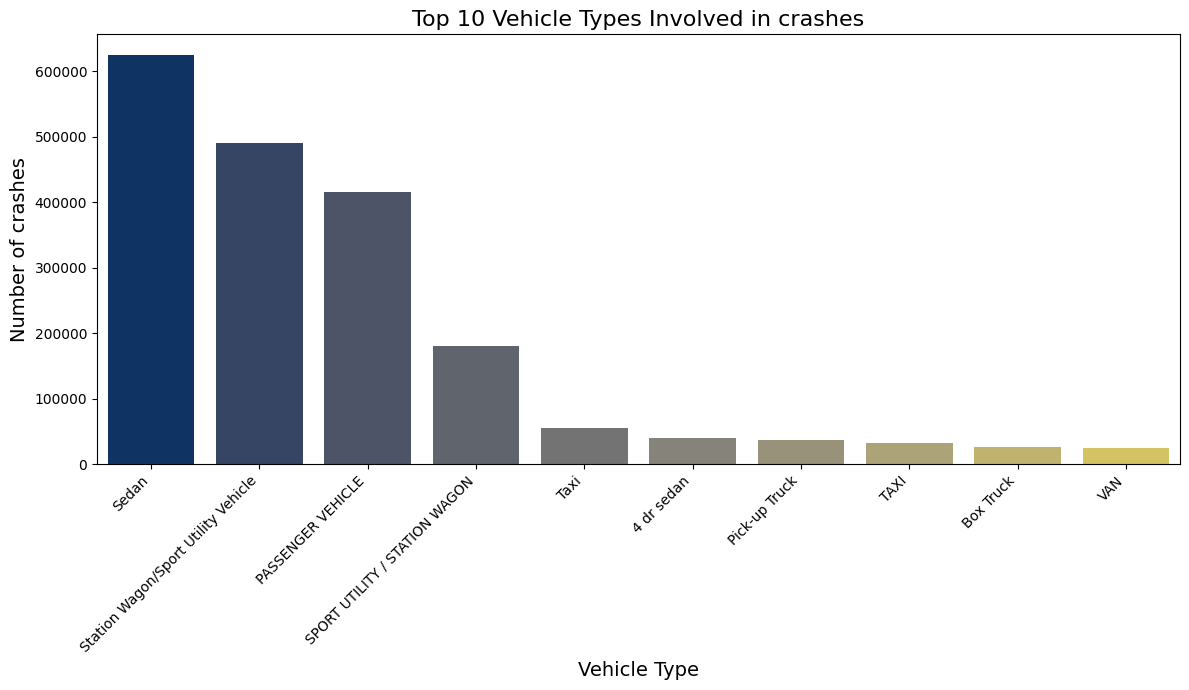

In [8]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 3 vehicles that were most involved in crashes


> *  Sedan
> *  Station Wagon/ Sport Utility Vehicle
> *   Passenger Vehicles







**Data** **Frame**

/tmp/ipython-input-9-2648022795.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


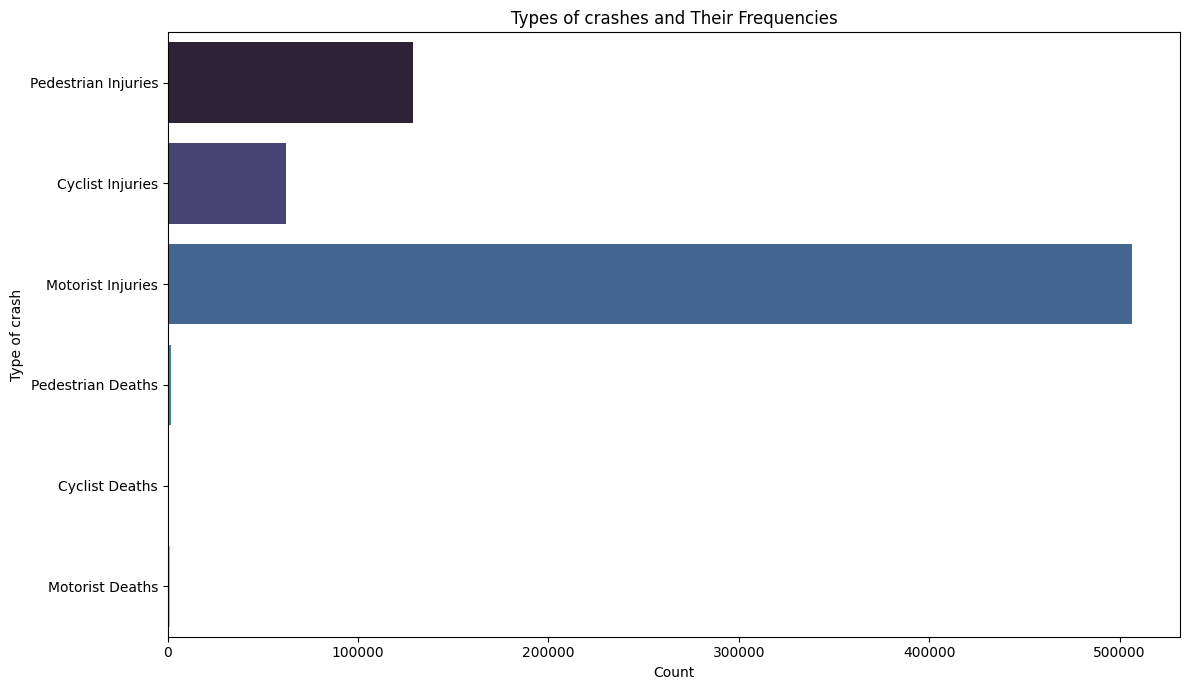

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()

---

##<font color='crimson'> **Milestone #3 - Time Series Analysis**</font>
 Deep Dive into Time Series Analysis to better understand the data's trends over time.

**Chart to display the average number of crashes per hour of the day. **

/tmp/ipython-input-10-3484692116.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


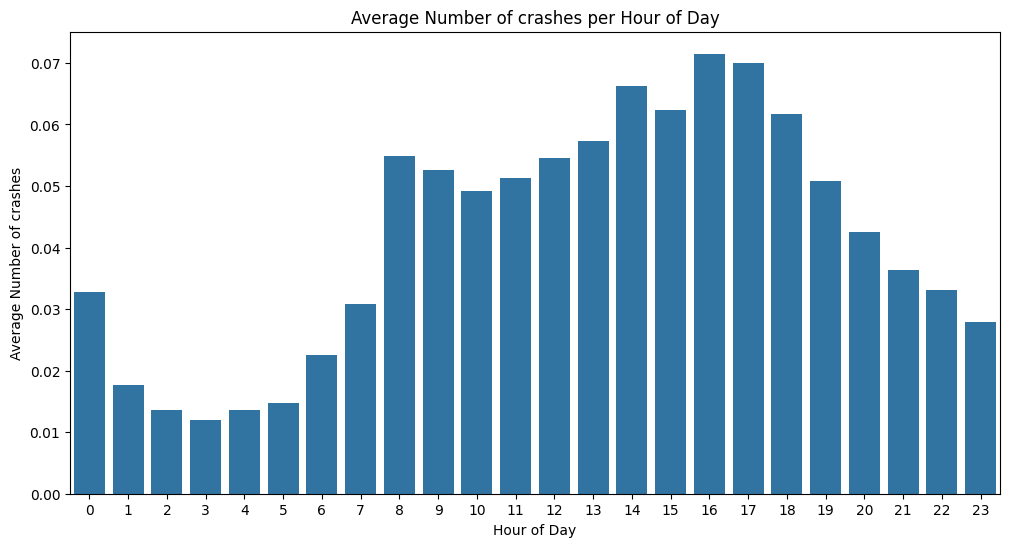

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.time

# Time of Day Analysis
data['Hour of Day'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M:%S').dt.hour


# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / len(data)

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()


Plot a graph to determine how COVID-19 impacted the number of crashes per month, if at all.


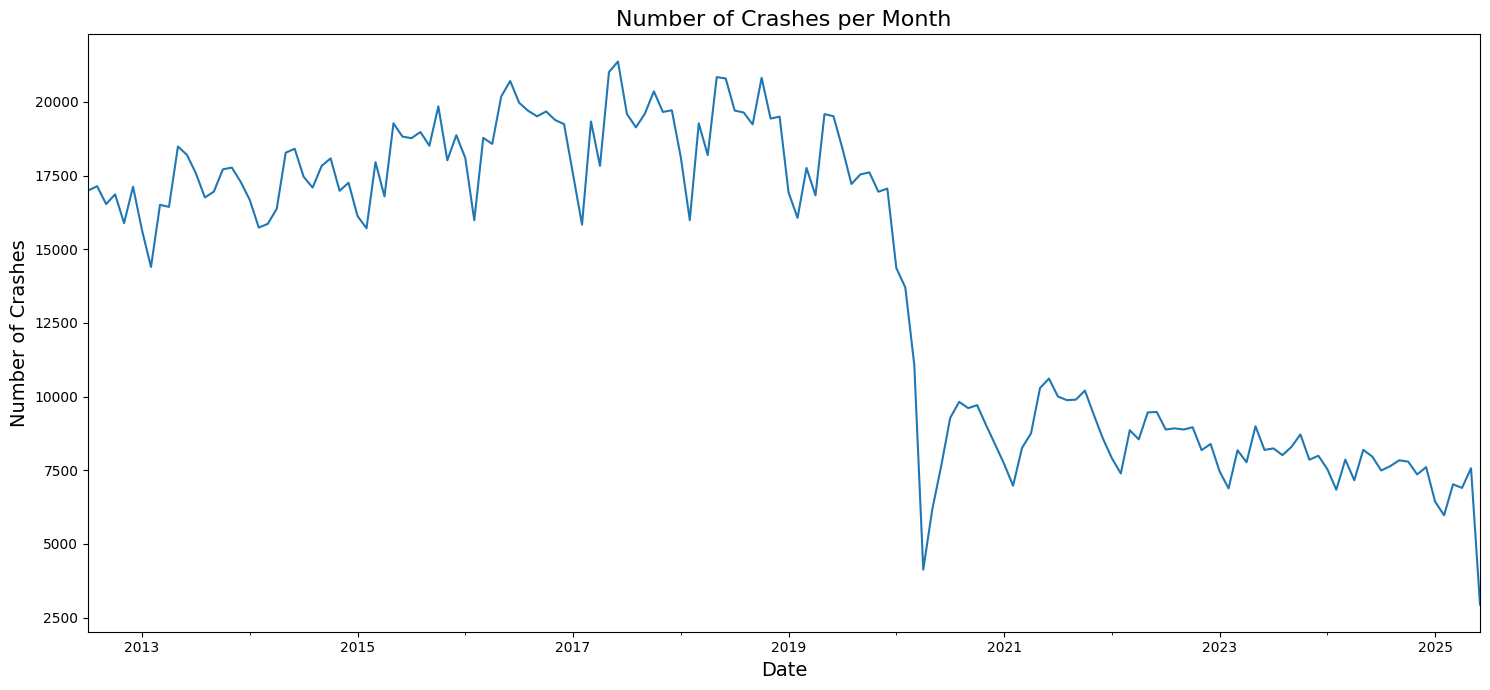

In [11]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()


> Clearly COVID-19 lockdown restrictions led to a dramatic decrease in the number of crashes reported.
> However it also seems that the crashes have not returned to pre-pandemic levels, suggesting less traffic overall (perhaps due to remote and hybrid working adapttiosns)



**Time series decomposition to review trends, seasonality, and residuals.**

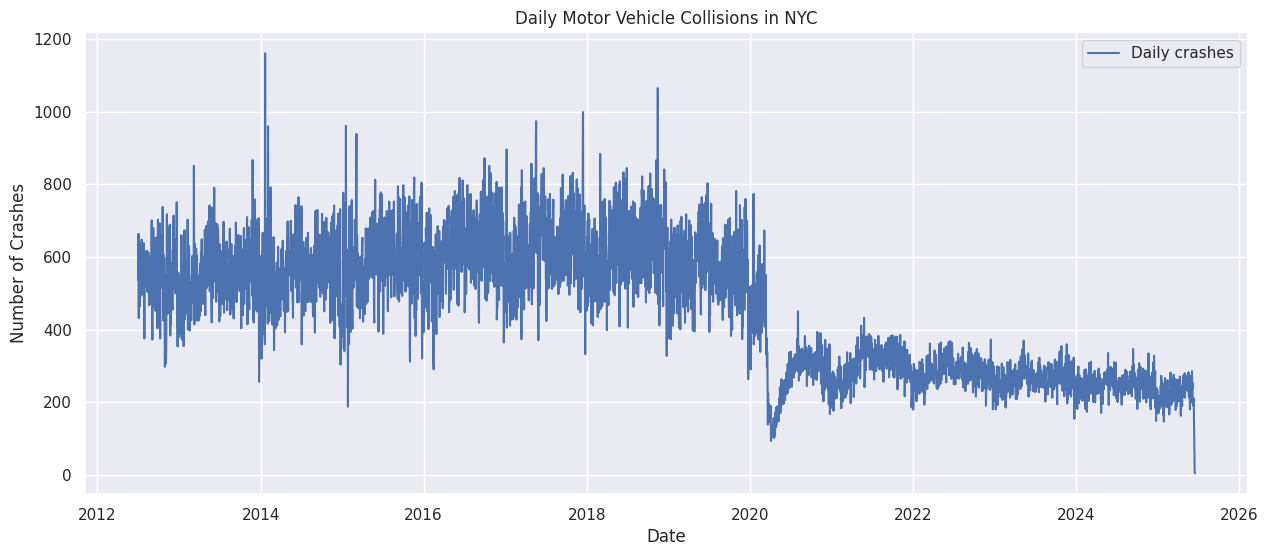

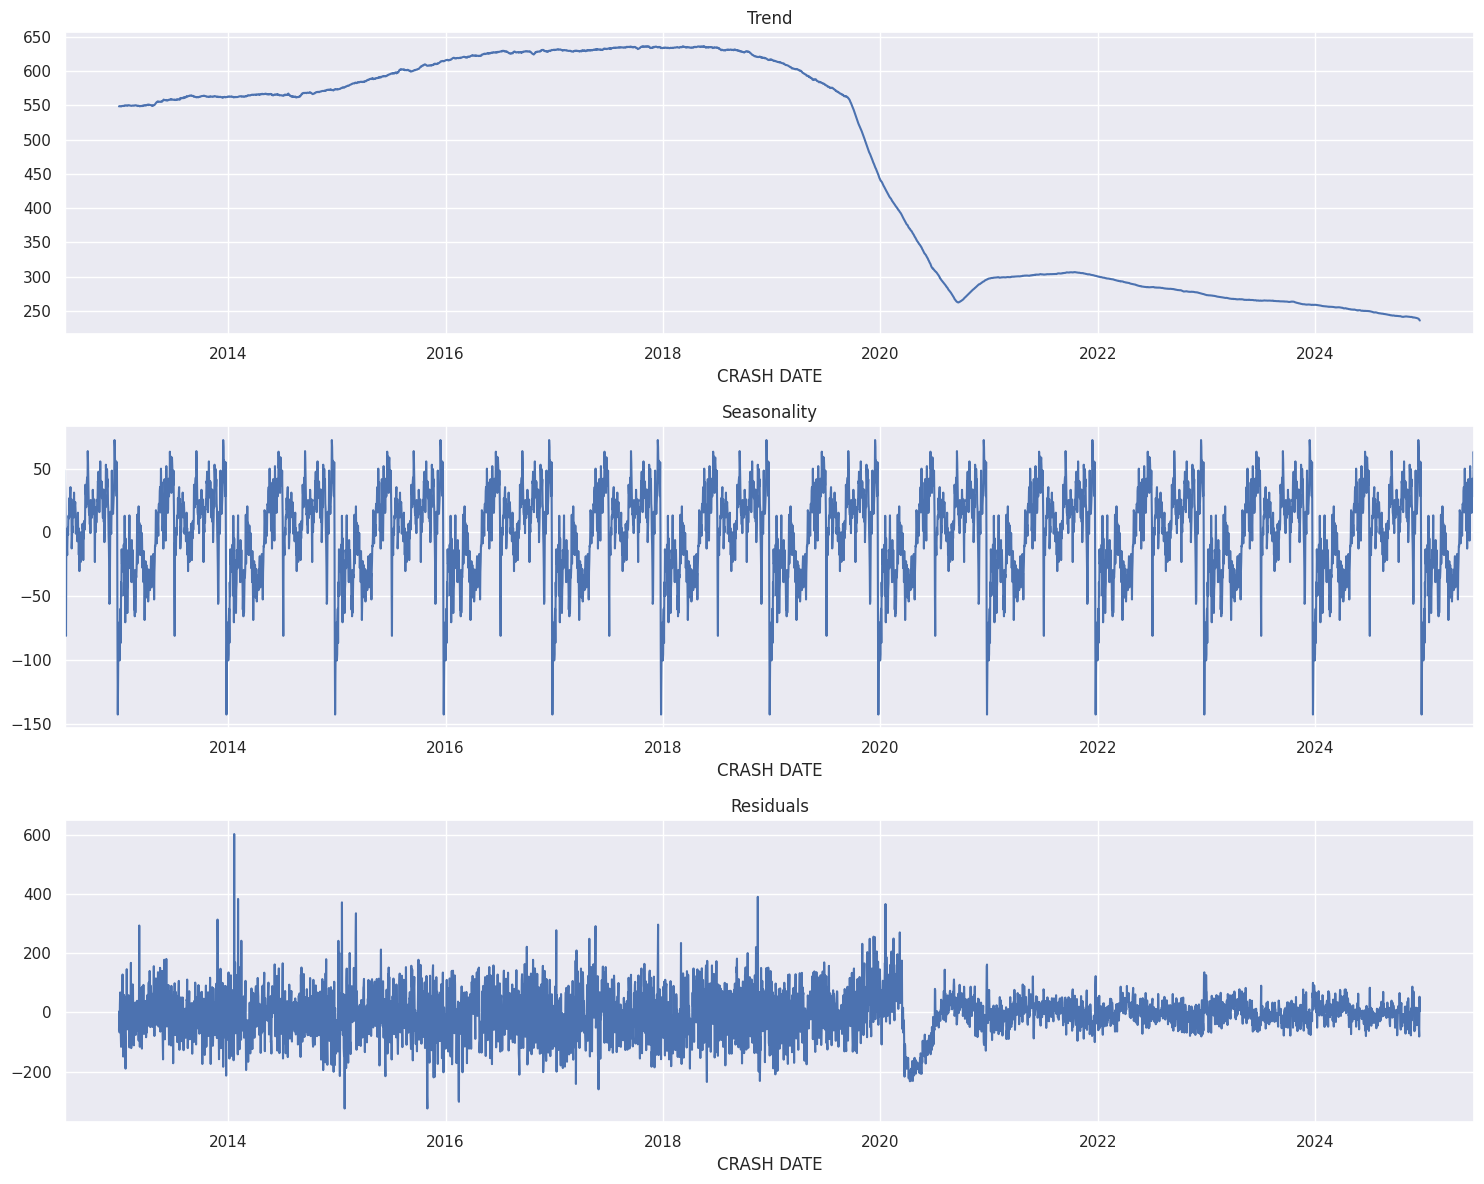

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City:

1. Time Series Plot: This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

2. Decomposed Components:
  
    2.1 Trend: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

    2.2 Seasonality: This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

    2.3 Residuals: These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

---

##<font color='crimson'>**Milestone #4 - Geospatial Analysis**</font>
GOAL: The main goal of this milestone is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

/tmp/ipython-input-13-2548767651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


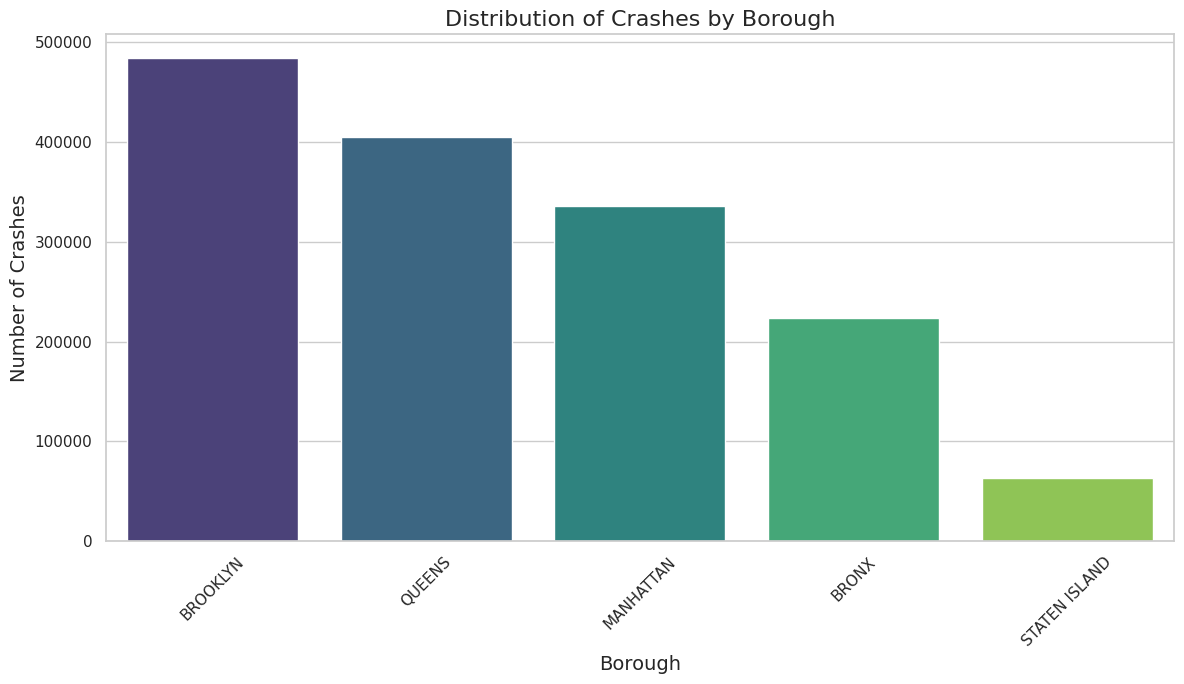

In [13]:
#Plot bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boroughs with the highest and lowest numbers of crashes

> * Highest: Brooklyn
> * Lowest:Staten Island



#HEATMAP

In [14]:
 #Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


#SEVERITY MAPPING

In [15]:
#TODO: Continue building your heatmap
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "blue"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")

---
---

# <font color='crimson'>MY RESEARCH QUESTION: How do the numbers of collisions in the Upper West side compare to the number of collisions in the rest of Upper Manhattan?

Why does this discrepancy exist?</font>


In [16]:
# Number of Collisions in the Upper West Side

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv')


df['ZIP CODE'] = df['ZIP CODE'].astype(str)


uws_zip_codes = ['10023', '10024', '10025', '10069']


uws_crashes = df[df['ZIP CODE'].isin(uws_zip_codes)]

num_crashes_uws = len(uws_crashes)

fatal_crashes_uws = uws_crashes[uws_crashes['NUMBER OF PERSONS KILLED'] > 0]
num_fatal_crashes_uws = len(fatal_crashes_uws)

percentage_fatal_crashes_uws = (num_fatal_crashes_uws / num_crashes_uws) * 100 if num_crashes_uws > 0 else 0
num_crashes = len(uws_crashes)

print(f"Number of car crashes in the Upper West Side (ZIPs {', '.join(uws_zip_codes)}): {num_crashes}")
print(f"Percentage of crashes in Upper West side that ended in fatalities: {percentage_fatal_crashes_uws:.2f}%")

/tmp/ipython-input-16-2634231606.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv')


Number of car crashes in the Upper West Side (ZIPs 10023, 10024, 10025, 10069): 7560
Percentage of crashes in Upper West side that ended in fatalities: 0.13%


Number of car crashes in the Upper West Side (ZIPs 10023, 10024, 10025, 10069): **7560**

In [17]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv')

df['ZIP CODE'] = df['ZIP CODE'].astype(str)

upper_manhattan_zips = [
    '10026', '10027', '10030', '10031', '10032', '10033',
    '10034', '10035', '10037', '10039'
]

upper_manhattan_crashes = df[df['ZIP CODE'].isin(upper_manhattan_zips)]

num_crashes_upper_manhattan = len(upper_manhattan_crashes)

fatal_crashes_upper_manhattan = upper_manhattan_crashes[upper_manhattan_crashes['NUMBER OF PERSONS KILLED'] > 0]
num_fatal_crashes_upper_manhattan = len(fatal_crashes_upper_manhattan)

percentage_fatal_crashes_upper_manhattan = (num_fatal_crashes_upper_manhattan / num_crashes_upper_manhattan) * 100 if num_crashes_upper_manhattan > 0 else 0

print(f"Number of car crashes in Upper Manhattan (ZIPs {', '.join(upper_manhattan_zips)}): {num_crashes_upper_manhattan}")
print(f"Percentage of crashes in Upper Manhattan that ended in fatalities: {percentage_fatal_crashes_upper_manhattan:.2f}%")

/tmp/ipython-input-17-3577744567.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv')


Number of car crashes in Upper Manhattan (ZIPs 10026, 10027, 10030, 10031, 10032, 10033, 10034, 10035, 10037, 10039): 16522
Percentage of crashes in Upper Manhattan that ended in fatalities: 0.10%


# DATA VISUALIZATION

(np.float64(-1.0999960664974613),
 np.float64(1.0999993102322159),
 np.float64(-1.0999993814481752),
 np.float64(1.0999999705451513))

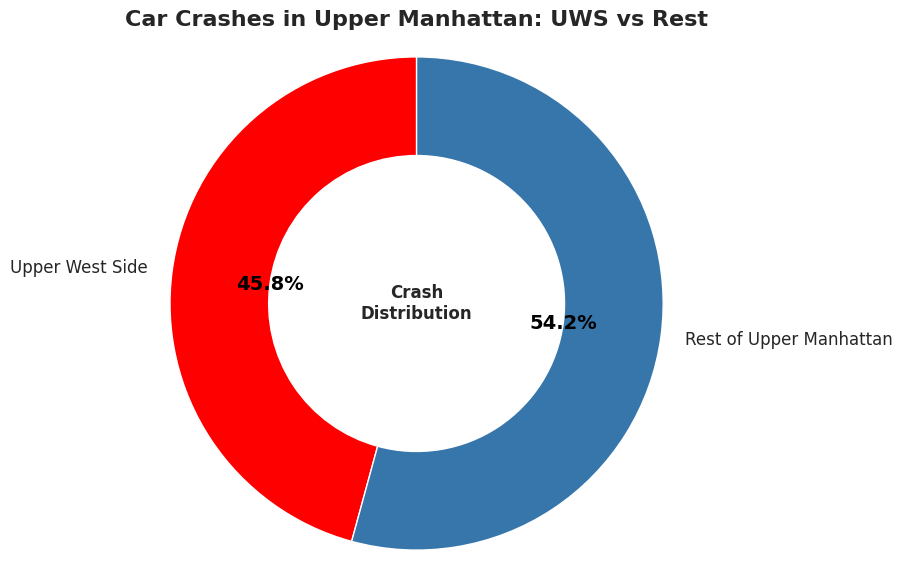

In [18]:
import matplotlib.pyplot as plt


uws_count = len(uws_crashes)
upper_manhattan_total = len(upper_manhattan_crashes)
rest_of_upper_manhattan = upper_manhattan_total - uws_count


labels = ['Upper West Side', 'Rest of Upper Manhattan']
sizes = [uws_count, rest_of_upper_manhattan]
colors = ['red', '#3776ab']


fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)


plt.setp(autotexts, size=14, weight='bold', color='BLACK')
plt.setp(texts, size=12)

ax.text(0, 0, 'Crash\nDistribution', ha='center', va='center', fontsize=12, weight='bold')


plt.title('Car Crashes in Upper Manhattan: UWS vs Rest', fontsize=16, weight='bold')
plt.axis('equal')




---

##<font color='crimson'>**Milestone #6 - INSIGHTS AND STORYTELLING**</font>



**Contributing factors to UWS crashes**

In [19]:
import pandas as pd

file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv"
df = pd.read_csv(file_path)

df['ZIP CODE'] = df['ZIP CODE'].astype(str)

uws_zip_codes = ['10023', '10024', '10025', '10069']

uws_crashes = df[df['ZIP CODE'].isin(uws_zip_codes)]

uws_top_factor = uws_crashes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3)

print("Highest cause of crashes in the Upper West Side:")
print(uws_top_factor)

/tmp/ipython-input-19-4159676172.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Highest cause of crashes in the Upper West Side:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       3943
Driver Inattention/Distraction     975
Other Vehicular                    335
Name: count, dtype: int64


**Contributing factors to the rest of Upper Manhattan crashes**

In [20]:
import pandas as pd

file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv"
df = pd.read_csv(file_path)

# Ensure 'ZIP CODE' is string type to avoid issues with mixed types
df['ZIP CODE'] = df['ZIP CODE'].astype(str)

# Rest of Upper Manhattan
upper_manhattan_zip_codes = [ '10026', '10027', '10030', '10031', '10032', '10033',
    '10034', '10035', '10037', '10039']

upper_manhattan_crashes = df[df['ZIP CODE'].isin(upper_manhattan_zip_codes)]

# Find the most frequent contributing factor in the Upper West Side
upper_manhattan_top_factor = upper_manhattan_crashes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3)

print("Highest cause of crashes in the rest of Upper Manhattan:")
print(upper_manhattan_top_factor)

/tmp/ipython-input-20-806835999.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Highest cause of crashes in the rest of Upper Manhattan:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       9505
Driver Inattention/Distraction    1931
Other Vehicular                    617
Name: count, dtype: int64


In [21]:
import pandas as pd

file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250623.csv"
df = pd.read_csv(file_path)

# Ensure 'ZIP CODE' is string type to avoid issues with mixed types
df['ZIP CODE'] = df['ZIP CODE'].astype(str)

# Rest of Upper Manhattan
upper_manhattan_zip_codes = [ '10026', '10027', '10030', '10031', '10032', '10033',
    '10034', '10035', '10037', '10039']

upper_manhattan_crashes = df[df['ZIP CODE'].isin(upper_manhattan_zip_codes)]

# Find the most frequent contributing factor in the Upper West Side
upper_manhattan_top_factor = upper_manhattan_crashes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3)

print("Highest cause of crashes in the rest of Upper Manhattan:")
print(upper_manhattan_top_factor)

/tmp/ipython-input-21-806835999.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Highest cause of crashes in the rest of Upper Manhattan:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       9505
Driver Inattention/Distraction    1931
Other Vehicular                    617
Name: count, dtype: int64


# INSIGHTS: POSSIBLE THEORIES AND SOLUTIONS



THEORIES
- COLUMBIA CAMPUS
- STREET SHAPES
- Subway Accesibility
- POPULATION DENSITY

Possible Solutions


---
---